## Red Wine quality Prediction project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

from warnings import filterwarnings
filterwarnings(action='ignore')

In [58]:
data=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")

In [59]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.shape

(1599, 12)

In [7]:
data.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
data.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
#data analysis
data.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

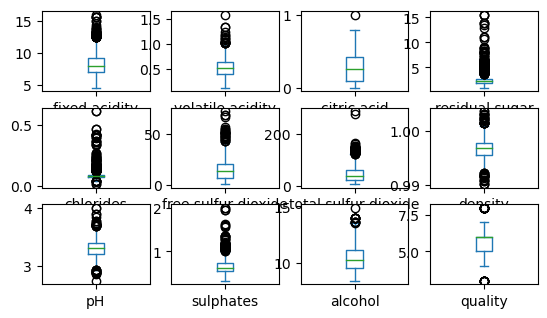

In [32]:
data.plot(kind="box",subplots= True,layout=(4,4),sharex =False)

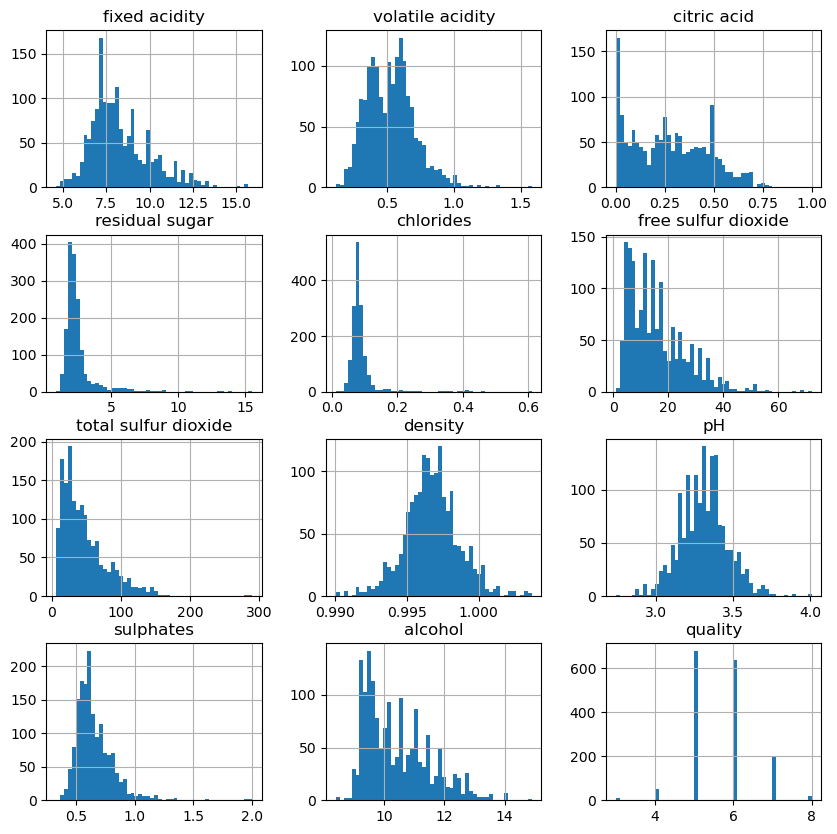

In [34]:
data.hist(figsize=(10,10),bins=50)
plt.show()

In [36]:
# Feature Selection

data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1457,7.6,0.490,0.33,1.9,0.074,27.0,85.0,0.99706,3.41,0.58,9.0,5
361,8.6,0.450,0.31,2.6,0.086,21.0,50.0,0.99820,3.37,0.91,9.9,6
373,7.4,0.550,0.22,2.2,0.106,12.0,72.0,0.99590,3.05,0.63,9.2,5
52,6.6,0.500,0.04,2.1,0.068,6.0,14.0,0.99550,3.39,0.64,9.4,6
1498,6.6,0.895,0.04,2.3,0.068,7.0,13.0,0.99582,3.53,0.58,10.8,6


In [37]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [38]:
data['goodquality']=[1 if x>=7 else 0 for x in data['quality']]
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
113,10.1,0.310,0.44,2.3,0.080,22.0,46.0,0.99880,3.32,0.67,9.7,6,0
648,8.7,0.480,0.30,2.8,0.066,10.0,28.0,0.99640,3.33,0.67,11.2,7,1
1010,8.9,0.280,0.45,1.7,0.067,7.0,12.0,0.99354,3.25,0.55,12.3,7,1
1367,6.9,0.540,0.30,2.2,0.088,9.0,105.0,0.99725,3.25,1.18,10.5,6,0
490,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6,6,0


In [41]:
X = data.drop(['quality','goodquality'],axis = 1)
Y = data['goodquality']



In [44]:
data['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [45]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [46]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64

In [48]:
# splitting dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)


In [49]:
model= DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [50]:
y_pred= model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

In [53]:
print("Accuracy score:",accuracy_score(Y_test,y_pred))

Accuracy score: 0.884375


In [54]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("AUC value:", roc_auc)

AUC value: 0.7689950980392156


In [55]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature Importances:")
print(feature_importances)


Feature Importances:
fixed acidity           0.073057
volatile acidity        0.100191
citric acid             0.064419
residual sugar          0.067771
chlorides               0.067841
free sulfur dioxide     0.062375
total sulfur dioxide    0.153106
density                 0.034998
pH                      0.060274
sulphates               0.091774
alcohol                 0.224194
dtype: float64


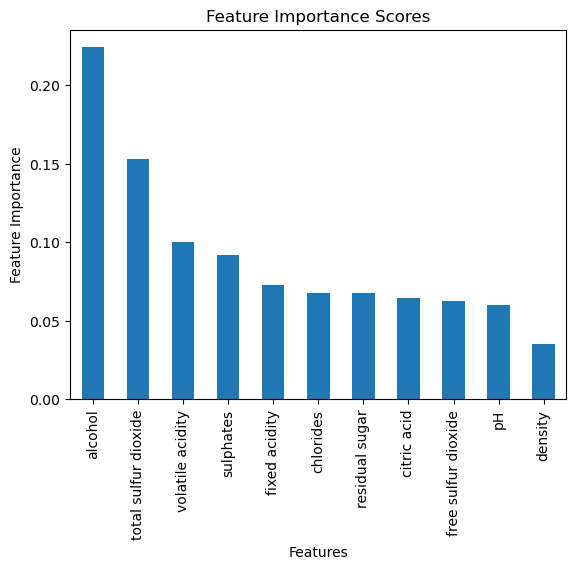

In [56]:
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()

In [57]:
top_features = feature_importances.sort_values(ascending=False).head(5)
print("Top Features:")
print(top_features)


Top Features:
alcohol                 0.224194
total sulfur dioxide    0.153106
volatile acidity        0.100191
sulphates               0.091774
fixed acidity           0.073057
dtype: float64
